# Cheat sheet for matplotlib

## Normal module load

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns # for seaborn style
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import Axes3D

In [61]:
print("matplotlib version {}".format(matplotlib.__version__))

matplotlib version 3.3.1


## Line chart

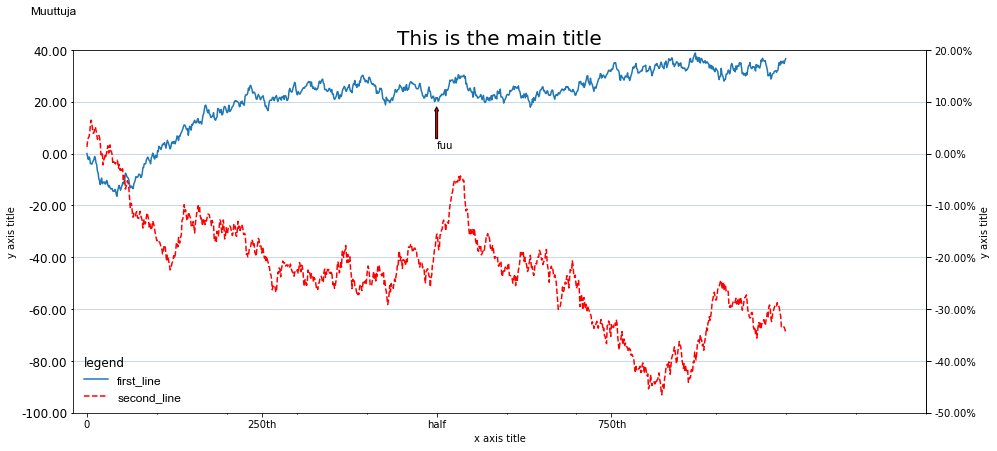

In [62]:
plt.close('all')

########################################
# Data
########################################
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

########################################
# Plot
########################################

#################
# Figure skeleton
#################
# Figure
fig = plt.figure(figsize=(15,7))
# Primray axes
ax1 = fig.add_subplot(1,1,1)

# Secondary axes with shared x-axis
ax2 = ax1.twinx()
# Hide second axes spines except for right
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)

#################
# Plot lines
#################
# First line
lns1 = ax1.plot(x,y1, label = 'first_line')
# Second line with second y-axis
lns2 = ax2.plot(x,y2,'--',color = 'r', label = 'second_line')

#################
# View limits
#################
# Set primary axes x-axis limit
ax1.set_xlim(-20,1200)

# Set primary axes y-axis limit
ax1.set_ylim(-100,40)

# Set secondary axes y-axis limit
ax2.set_ylim(-50,20)

#################
# Main title
#################
ax1.set_title('This is the main title', fontsize = 20)

#################
# Primary axes x-axis
#################

# Set x-axis label
ax1.set_xlabel('x axis title')

# x-axis major ticks and labels as fixed
ax1.xaxis.set_major_locator(ticker.FixedLocator((np.arange(0,1000,250))))
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(['0','250th','half','750th','last']))
ax1.tick_params(which="minor", axis="x", length=2, width=1, labelsize = 12)

# x-axis major minor displayed, set with MultipleLocator, but no labels
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax1.tick_params(which="minor", axis="x", length=1, width=1, labelsize = 8)


#################
# Primary axes y-axis
#################
# Set y-axis label
ax1.set_ylabel('y axis title')

# y-axis major ticks as is, and labels formatted
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:0.2f}'.format(x)))
ax1.tick_params(which="major", axis="y", length=2, width=1, labelsize = 12)

#################
# Secondary axes y-axis
#################
# Set y-axis label
ax2.set_ylabel('y axis title')

# y-axis major aligned with LinearLocator, and labels formatted
ax2.yaxis.set_major_locator(ticker.LinearLocator(8)) # TO MATCH TO ax1 TICKLINES, SET int HERE TO SAME AMOUNT OF TICKS AS ON ax1
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:0.2%}'.format(x/100)))
ax2.tick_params(which="major", axis="y", length=5, width=1, labelsize = 10)


#################
# Grid on primary axes y-axis major ticks
#################
ax1.set_facecolor('white') # fill color of plot
fig.patch.set_facecolor('white') # fill of area outside plot
ax1.grid(axis='y',which='major',color='steelblue', linestyle='-', linewidth=1, alpha = 0.3)
ax1.set_axisbelow(True) # make sure grid stays in the backgorund


# Annotations
ax1.annotate('fuu',xy = (500,18), xytext = (500, 5)
             ,arrowprops = dict(facecolor = 'red',headwidth=4,width=2,headlength=4)
             ,horizontalalignment='left',verticalalignment='top')

#################
# legend 
#################
arial_font = font_manager.FontProperties(family='Arial',style='normal', size=12)

## Usual siple legend command
#leg = ax1.legend(loc = 1, facecolor = 'green', frameon=False, prop = arial_font)

# Legend command when need to fetch series from multiple axes
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc = 3, facecolor = 'green', frameon=False, prop = arial_font)
leg._legend_box.align = "left"    

# Set legend title
leg.set_title('legend',prop = {'size':12})

#################
# Additional axes labels
#################
plt.text(0.07, 0.92, 'Muuttuja', fontsize = 12,fontname = 'Arial', transform=plt.gcf().transFigure)

#################
# Adjusting axes positions
#################
# Using subplots_adjust
plotadjust = {'left':0.11,'bottom': 0.13,'right':0.90,'top':0.85,'wspace':None,'hspace':None}
plt.subplots_adjust(left = plotadjust['left'], bottom = plotadjust['bottom'],
                    right = plotadjust['right'], top = plotadjust['top'],
                    wspace = plotadjust['wspace'], hspace = plotadjust['hspace'])

# Sometimes subplots_adjust with multiple axes won't do it, adjust axes manually instead
#ax1.set_position([0.2, 0.125, 0.75, 0.77], which='both') # this replaces the usual subplots_adjust

#################
# Saving
#################
#plt.savefig(saveimgpath + ".png", dpi=300, facecolor = fig.get_facecolor(), edgecolor='none')

## Scatters

### Scatter with continuous color map

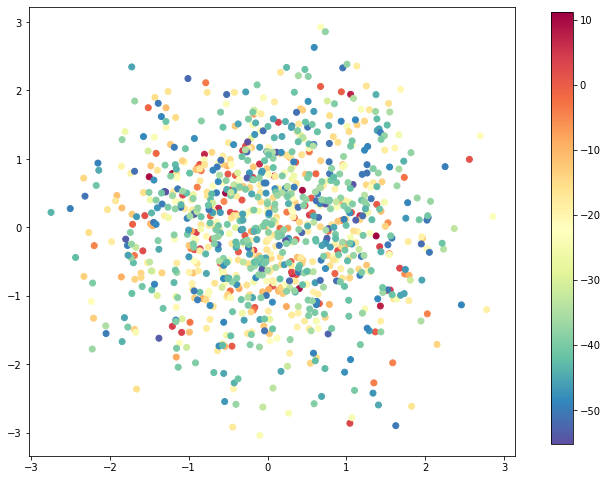

In [63]:
# Data
df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000), 'third':np.random.randn(1000).cumsum()})

# Choose how to plot
var1 = 'first'
var2 = 'second'
colorby = 'third'

# Scatter
fig = plt.figure(figsize=(10,8))        
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x=var1,y=var2,c=colorby,data=df,cmap=plt.cm.Spectral_r)
plt.subplots_adjust(left= None, bottom = 0.1, right = 0.8, top = None, wspace = None, hspace = None)

# Color bar
cbaxes = fig.add_axes([0.85, 0.12, 0.03, 0.75])
_ = plt.colorbar(scatter, cax = cbaxes)

### Scatter with discrete color map

[Text(1, 1.35, 'g1'), Text(1, 2.0, 'g2'), Text(1, 2.65, 'g3')]

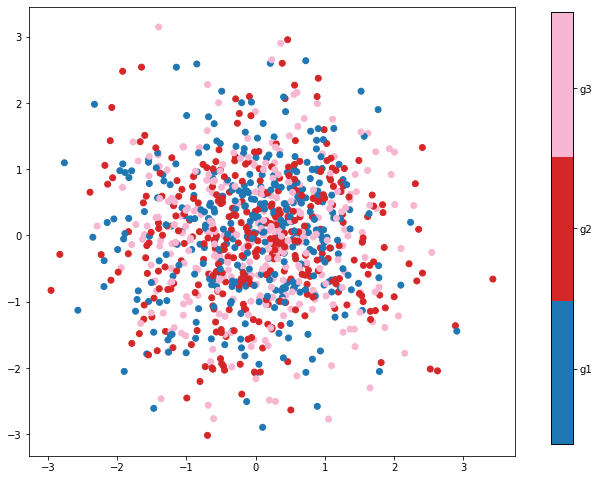

In [64]:
# Data
import matplotlib.colors as colors

df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000),'third':np.random.randint(1,4, size=1000)})
#mapping = {1:'g1', 2:'g2', 3:'g3'}
#df['third'] = df['third'].map(mapping)

# Choose how to plot
var1 = 'first'
var2 = 'second'
colorby = 'third'

# Colors
noofcolors = len(df[colorby].unique())
clrs = list(plt.cm.tab20(np.arange(0,1,1/noofcolors)))
#clrs = ['red', 'blue', 'orange']
cmap = colors.ListedColormap(clrs)

# Scatter
fig = plt.figure(figsize=(10,8))        
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x=var1,y=var2,c=colorby,data=df,cmap=cmap)
plt.subplots_adjust(left= None, bottom = 0.1, right = 0.8, top = None, wspace = None, hspace = None)

# Color bar
cbaxes = fig.add_axes([0.85, 0.12, 0.03, 0.75])
cbar = fig.colorbar(scatter,cax = cbaxes)
cbar = fig.colorbar(scatter,cax = cbaxes,ticks=[1.35, 2, 2.65])
cbar.ax.set_yticklabels(['g1','g2','g3'])


### Multiple scatter with colormap in each

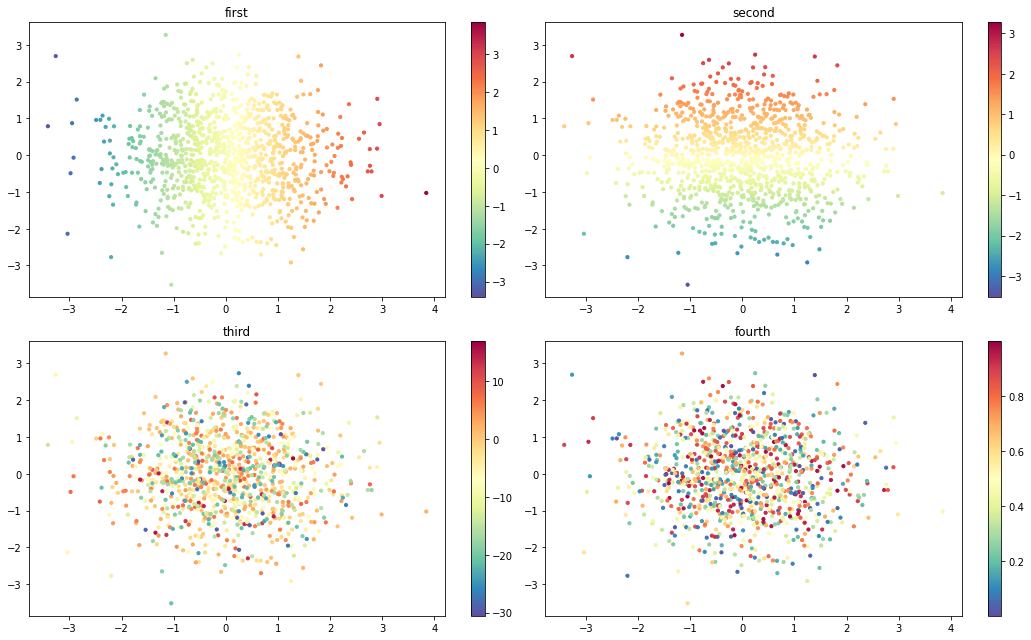

In [65]:
# Data
df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000)
                          ,'third':np.random.randn(1000).cumsum(), 'fourth':np.random.rand(1000)})

fig = plt.figure(figsize=(15,9))
colorby = df.columns

for i in range(0,len(colorby)):    
    ax = fig.add_subplot(2,2,i+1)
    scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], s=10, c = df[colorby[i]], cmap = plt.cm.Spectral_r)
    plt.colorbar(scatter, ax = ax)
    ax.set_title(colorby[i])    
    fig.tight_layout()

## Filled area chart

Text(0.5, 1.0, 'Title with Latex ($x^2$) ')

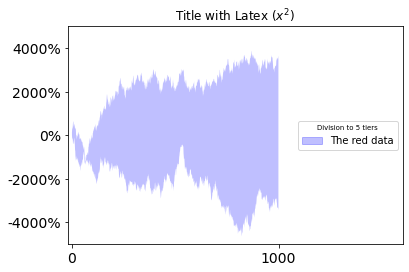

In [66]:
# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1,linewidth = 0)
ax1.plot(x,y2,alpha = 0)

# Fill area between two lines
ax1.fill_between(range(len(y1)), 
                       y1, y2, 
                       facecolor='blue', 
                       alpha=0.25)

# Axis limits
ax1.set_xlim(-20,1600)
ax1.set_ylim(-50,50)

# Control axis tick number
ax1.locator_params(axis='y', nbins=6)
ax1.locator_params(axis='x', nbins=2)

## If the above does not work, try this
#every_nth = 2
#for n, label in enumerate(ax.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)

# Tick label size
ax1.tick_params(axis='both', which='major', labelsize=14)

# legend 
red_patch = mpatches.Patch(color='blue', alpha = 0.25, label='The red data')
leg = ax1.legend(handles=[red_patch],loc=7, frameon = True, title='Legend')
leg.set_title("Division to 5 tiers", prop = {'size':'x-small'})

# Format y to percentages
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax1.set_title("Title with Latex ($x^2$) ")

 ## Histograms
- plt.his() produces half-open, left-inclusive bins. Right-inclusion needs to be hacked by adding a small value

### Histogram where integral sums to 1

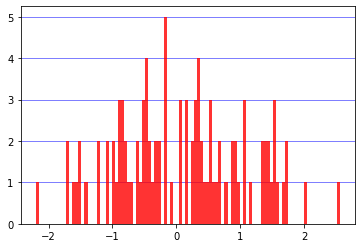

In [67]:
data = np.random.randn(100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data,bins=100, color = 'r', alpha=0.8)
# Grid
ax.grid(axis='y',color='blue', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

### Histogram where bar heights sums to 1

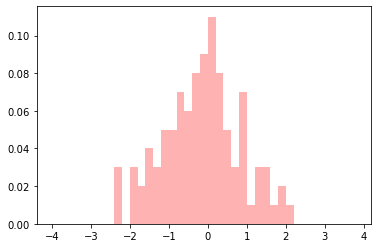

In [68]:
data = np.random.randn(100)
weights = np.ones_like(data)/float(len(data))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# hack for right-inclusion
bins = list(np.arange(-4.0, 4.0, 0.2))
bins = [x + 0.00000001 for x in bins]

_ = ax.hist(data, weights = weights, bins=bins, color = 'r', alpha=0.3)

### Histogram over date counts

,date,val
0,2008-04-10,0
1,2008-04-15,1
2,2008-08-11,2
3,2008-12-12,3


<AxesSubplot:xlabel='date,date'>

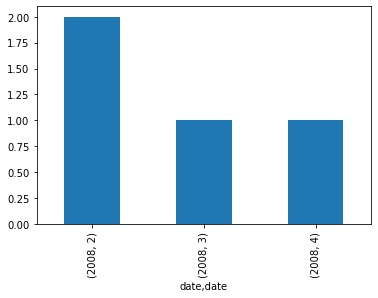

In [69]:
df = pd.DataFrame(np.arange(4), [pd.Timestamp('2008-04-10'), pd.Timestamp('2008-04-15'), pd.Timestamp('2008-08-11'), pd.Timestamp('2008-12-12')])
df.reset_index(inplace = True, drop = False)
df.columns = ['date', 'val']
display(df.head())
df["date"].groupby([df["date"].dt.year, df["date"].dt.quarter]).count().plot(kind="bar")

## Bar chart

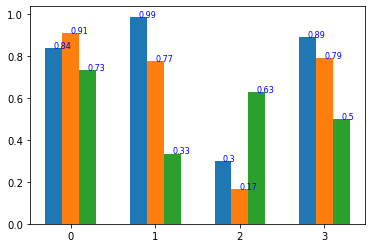

In [70]:
df = pd.DataFrame(np.random.rand(4,3), columns = ['ff', 'ee', 'tt'], index = [0,1,2,3])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(df.index - 0.2, df.iloc[:,0], width = 0.2)
ax.bar(df.index, df.iloc[:,1], width = 0.2)
ax.bar(df.index + 0.2, df.iloc[:,2], width = 0.2)
ax.set_xticks(df.index)
ax.set_xticklabels(map(str,df.index))

pos = -0.2
for h in range(2,-1,-1):
    for i, v in enumerate(df.iloc[:,h]):
        ax.text((i - pos) , v , str(round(v,2)), color='blue', fontsize = 8)
    pos += 0.2

## pandas data frame plot
Also showing how to span multiple subplots with one plot. The current way will be dropped in future releases, new way here: https://stackoverflow.com/a/53978336.

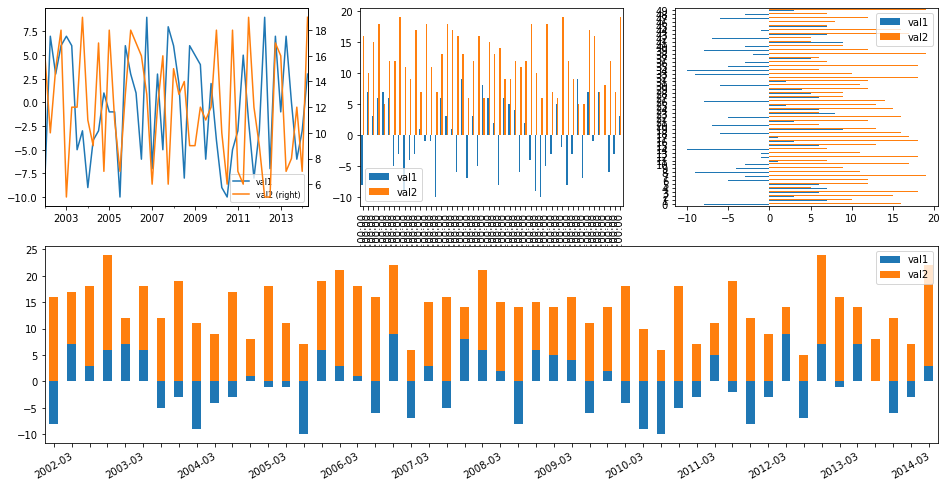

In [71]:
df = pd.DataFrame(
    data={"val1": np.random.randint(low=-10, high=10, size=50, dtype='l'),
          "val2": np.random.randint(low=5, high=20, size=50, dtype='l')},
    index=pd.date_range(start='2002-01-01', periods=50, freq='Q'))

fig = plt.figure(figsize=(16, 8))

###############
# Top-left axis
###############
ax = plt.subplot(2, 3, 1)
df[["val1"]].plot(ax=ax)
df[["val2"]].plot(ax=ax, secondary_y=True)
ax._shared_x_axes.remove(ax)

# Grabbing all existing legend handles for modification
labels = [x.get_text() for x in ax.get_legend().get_texts()]
handles = ax.get_legend().legendHandles
ax.legend(handles, labels, loc="lower right", prop={"size":8})

###############
# Top-center axis
###############
ax = plt.subplot(2, 3, 2)
df.plot.bar(ax=ax)

# Top-right axis
ax = plt.subplot(2, 3, 3)
df.plot.barh(ax=ax, use_index=False)

###############
# Bottom axis
###############
# Plotting via pandas is pretty bad with custom formatting of date tick labels.
# Workaround from here: github.com/pandas-dev/pandas/issues/1918
ax = plt.subplot(2, 1, 2)
df.plot.bar(ax=ax, stacked=True)
ax._shared_x_axes.remove(ax) # Stop sharing x-axis with others
ax.xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%Y-%m")))
n = 4
_ = [l.set_visible(False) for i, l in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.tick_params(axis="x", rotation=30)

# Sometimes auto date tick formatter works, but not here with multiple axes
#ax.autofmt_xdate()

## Sample mean bars with colouring depending on confidence

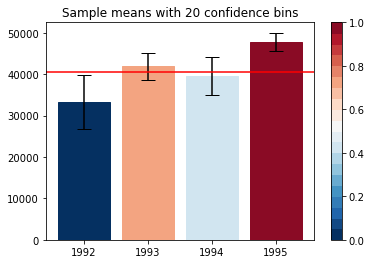

In [72]:
import math
from matplotlib.colors import ListedColormap
import scipy.stats as st
import statsmodels.stats.api as sms

def plot_bars(df, uservalue):
    '''
    df: DataFrame containing data
    uservalue: value for horizontal line
    confint = 1 - confidence level
    '''
    
    confint = 0.95
    quantiles = 20
    
    # Define color map
    nobars = len(df)
    cmap = plt.cm.RdBu
    
    # Discretize color map (and reverse it)
    step = 1.0 / float(quantiles); val = 0; colors = []
    for _ in range(quantiles):
        val = math.floor((val + step) * 100) / 100
        colors.append(cmap(val))
        
    cmap = cmap.from_list('Custom cmap', colors[::-1], quantiles)    
    
    err = []
    tups = []
    for i in range(len(df)):
        a = df.iloc[i,]
        # End-points of conflev confidence intervals
        tup = st.norm.interval(confint, loc = a.mean(), scale = st.sem(a))
        tups.append(tup)
        err.append(a.mean() - tup[0])
    
    # Determine how big of a portion of the confidence interval uservalue covers
    barcolors = [np.nan] * nobars

    for j in range(nobars):
        # If uservalue less than starting point of confidence interval
        if uservalue < tups[j][0]:

            barcolors[j] = colors[0]
            
        # If uservalue equal or greater than ending point of confidence interval            
        elif uservalue >= tups[j][1]:

            barcolors[j] = colors[quantiles-1]        
        else:
            
            pct = (uservalue - tups[j][0]) / (tups[j][1] - tups[j][0])
            barcolors[j] = colors[int(round(pct*20))-1]

    # Figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Dummy scatter data in order to have color bar
    y = np.array([0, 1])
    scat = ax.scatter(y, y, c = y, cmap = cmap)
    ax.cla() # clear dummy data
    
    # Color bar on cleared dummy data
    plt.colorbar(scat)
    
    # Actual bars
    bars = ax.bar(df.index, df.mean(axis = 1), yerr = err, capsize = 7)
    for h in range(len(bars)):
        bars[h].set_color(barcolors[h])
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index.values.tolist())
    
    # Horizontal line
    ax.axhline(y = uservalue, color = 'red')
    
    ax.set_title('Sample means with ' + str(quantiles) + ' confidence bins')

    return(fig)

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])

fig = plot_bars(df, 40500)

## Ready-made plotter functions

### 3D scatter plot

In [73]:
def scatter3D(df,**kwargs):
    """
    Function to plot 3D scatter plot.
    Takes as innput a pandas data frame
    with shape (x, 3).
    
    Notes:
     - requires matplotlib to be imported as
       import matplotlib.pyplot as plt
    
    Versioning
    - 0.1 by Ville Voutilainen
        Initial build
    """
    from mpl_toolkits.mplot3d import Axes3D
    if df.shape[1] != 3:
        raise ValueError('Data frame does not have three columns.')
    
    figsize       = kwargs.get('figsize',(9,5))
    edgecolor     = kwargs.get('edgecolor','k')
    scatter_s     = kwargs.get('scatter_s', 40)
    title         = kwargs.get('title', None)
    xlabel        = kwargs.get('xlabel', df.columns[0])
    ylabel        = kwargs.get('ylabel', df.columns[1])
    zlabel        = kwargs.get('zlabel', df.columns[2])
    azim          = kwargs.get('azim', 0)
    elev          = kwargs.get('elev', 20)
    xlim          = kwargs.get('xlim',None)
    ylim          = kwargs.get('ylim',None)
    zlim          = kwargs.get('zlim',None) 
    color         = kwargs.get('color',"steelblue")
    cmap          = kwargs.get('cmap',None)    
    return_plot   = kwargs.get('return_plot', True)    

    ###################################
    # Core plot
    ###################################        
    fig = plt.figure(figsize=figsize)        
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], 
               edgecolor = edgecolor, s=scatter_s, c = color, cmap=cmap)    
    ax.view_init(azim = azim, elev = elev)
    
    ###################################
    # Stylings
    ###################################
    if title is not None:
        ax.set_title(title)    
    if xlabel != 'none':
        ax.set_xlabel(xlabel)
    if ylabel != 'none':
        ax.set_ylabel(ylabel)
    if zlabel != 'none':
        ax.set_zlabel(zlabel)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if zlim != None:
        ax.set_zlim(zlim)
        
    ###################################
    # Return
    ###################################    
    if return_plot == True:
        return fig, ax

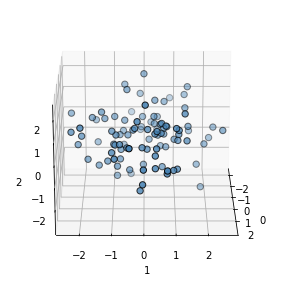

In [74]:
df = pd.DataFrame(np.random.randn(100,3))
scatter3D(df, return_plot = False)

###  Histogram (weighted) with two series 

In [75]:
def hist_two_series(y,weights,bins,labels,threshold,*args,**kwargs):
    """
    Notes:
        - saveimagpath needs to be path\filename
        - If plotadjust is not given then default setting is used in subplots_adjust().
          Else plotadjust is a dictionary that passes into subplots_adjust().
          In notebooks by default box_inches='tight', which makes subplots_adjust() 
          specifications not appear in inline plots correctly (but OK 
          in saved images). See default values at
          https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
    
    Author Ville Voutilainen
    
    Version history
    
    - 10.11.2018 ver 0.15
       -> If y is a list of length 1, plots only one series. Otherwise plots two series.
    - 19.9.2018 ver 0.15
       -> Added possibility for figure main title.
       -> Added subpot_adjust to be able to adjust axis placement.
       -> Added source text field.
       -> Added text for y-axis unit.
          
    - 19.9.2018 ver 0.1
       -> Initial build.
    """
    import sys
    from matplotlib import pyplot as plt
    import matplotlib.font_manager as font_manager
    from matplotlib.ticker import MultipleLocator
    
    figsize        = kwargs.get('figsize', (1.52962 * 6,6))
    xlabel         = kwargs.get('xlabel', '')
    ylabel         = kwargs.get('ylabel', '')
    yticklf        = kwargs.get('yticklf', '{:.2f}')
    xticklf        = kwargs.get('xticklf', '{:.2f}')    
    xlabelSize     = kwargs.get('xlabelSize', 16)
    ylabelSize     = kwargs.get('ylabelSize', 16)        
    xticks         = kwargs.get('xticks', 20)
    yticks         = kwargs.get('yticks', 5)
    minorxtickstep = kwargs.get('minorxtickstep', None)
    minorytickstep = kwargs.get('minorytickstep', None)
    majorticklen   = kwargs.get('majorticklen', 5)
    minorticklen   = kwargs.get('minorticklen', 3)    
    majortickwidth = kwargs.get('majortickwidth', 1)
    minortickwidth = kwargs.get('minortickwidth', 1)
    title          = kwargs.get('title', None)
    titlesize      = kwargs.get('titlesize', 16)    
    labelsize      = kwargs.get('labelsize', 16)
    legendloc      = kwargs.get('legendloc','best')
    legendsize     = kwargs.get('legendsize', 16)
    ylim           = kwargs.get('ylim', None)
    xlim           = kwargs.get('xlim', None)    
    y_format_mult  = kwargs.get('y_format_mult', 1)
    x_format_mult  = kwargs.get('x_format_mult', 1)
    leg_title      = kwargs.get('leg_title', None)
    leg_title_size = kwargs.get('leg_title_size', 16)
    plotadjust     = kwargs.get('plotadjust', None)
    sourcetext     = kwargs.get('sourcetext', 'Source')
    sourcetextsize = kwargs.get('sourcetextsize', 16)
    sourcetextbpad = kwargs.get('sourcetextbpad', 0.10)
    yunittext      = kwargs.get('yunittext', '')
    yunittextsize  = kwargs.get('yunittextsize', 16)    
    yunittextbpad  = kwargs.get('yunittextbpad', 0.02)    
    saveimgpath    = kwargs.get('saveimgpath', 'nosave')   
    
    # Force fonts
    arial_font = font_manager.FontProperties(
                        family='Arial',style='normal', size=legendsize)   
    force_font = {'fontname':'Arial'}
    
    # Define colors
    colors = \
    [
     "#D7E4DB" # white
    ,"#6F695D" # dark_grey
    ,"#370F4D" # dark_purple        
    ,"#e66f00" # brown       
    ,"#F09B0C" # orange      
    ,"#C6BD22" # yellow      
    ,"#916FBB" # light_purple
    ,"#5534BF" # purple      
    ,"#7D859C" # light_grey  
    ,"#ff3333" # red         
    ,"#666da3" # steelblue       
    ,"#ffb066" # text color orange
    ,"#9575bd" # text color purple
    ,"#b6bbc8" # text color grey  
    ,"#ff8080" # text color red   
    ,"#e1da51" # text color yellow
    ]

    # Figure skeleton
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot(1,1,1)
    
    # Histograms
    hist  = ax.hist(y[0], weights = weights[0], bins = bins, color = colors[1],
                    alpha = 1.0, label = labels[0])
    if len(y)>1:
        hist2 = ax.hist(y[1], weights = weights[1], bins = bins, alpha = 1.0,
                        label = labels[1], ec=colors[2], fill=False, lw = 1.5)

    # Style labels
    import matplotlib.ticker as ticker    
    ax.set_xlabel(xlabel, fontsize = xlabelSize, **force_font)
    ax.set_ylabel(ylabel, fontsize = ylabelSize, **force_font)
    
    # Style grid
    ax.set_facecolor(colors[0])
    fig.patch.set_facecolor(colors[0])
    ax.grid(axis='y',color=colors[11], linestyle='-', linewidth=2, alpha = 0.3)
        
    # Style axes
    if title is not None:
        ax.set_title(title, fontsize = titlesize)
    ax.set_axisbelow(True)
    plt.locator_params(axis='x', nbins=xticks)    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: yticklf.format(y*y_format_mult))) 
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: xticklf.format(x*x_format_mult)))     
    ax.locator_params(axis='y', nbins=yticks)
    ax.tick_params(axis='both', length=majorticklen, width=majortickwidth, which='major', labelsize=labelsize)
    ax.tick_params(axis='both', length=minorticklen, width=minortickwidth, which='minor')    
    if minorxtickstep != None:
        ax.xaxis.set_minor_locator(MultipleLocator(minorxtickstep))
    if minorytickstep != None:
        ax.yaxis.set_minor_locator(MultipleLocator(minorytickstep))        
    if ylim:
        ax.set_ylim(ylim)
    if xlim:
        ax.set_xlim(xlim)
    
    # Style legend
    leg = ax.legend(loc = legendloc, facecolor = colors[0], frameon=False, prop = arial_font)
    leg._legend_box.align = "left"    
    if leg_title != None:
        leg.set_title(leg_title,prop = {'size':leg_title_size})
    
    # Adjust plot layout
    if plotadjust is not None:
        plt.subplots_adjust(left= plotadjust['left'], bottom = plotadjust['bottom'],
                            right = plotadjust['right'], top = plotadjust['top'],
                            wspace = plotadjust['wspace'], hspace = plotadjust['hspace'])
    else:
        plotadjust = {'left':0.11,'bottom': 0.13,'right':0.95,'top':0.93,'wspace':0.2,'hspace':0.2}
        plt.subplots_adjust(left = plotadjust['left'], bottom = plotadjust['bottom'],
                            right = plotadjust['right'], top = plotadjust['top'],
                            wspace = plotadjust['wspace'], hspace = plotadjust['hspace'])      

    # Source text
    plt.text(plotadjust['left'], plotadjust['bottom'] - sourcetextbpad, sourcetext, fontsize = sourcetextsize,
             fontname = 'Arial', transform=plt.gcf().transFigure)
    
    # ylabel unit text put on top of the axis
    plt.text(plotadjust['left'], plotadjust['top'] + yunittextbpad, yunittext, fontsize = yunittextsize,
             fontname = 'Arial', transform=plt.gcf().transFigure)    
    
    # Saving figure
    if saveimgpath != 'nosave':
        plt.savefig(saveimgpath + ".png", dpi=300, facecolor = fig.get_facecolor(), edgecolor='none')
        
    if len(y)>1:
        return fig,ax,hist,hist2
    else:
        return fig,ax,hist

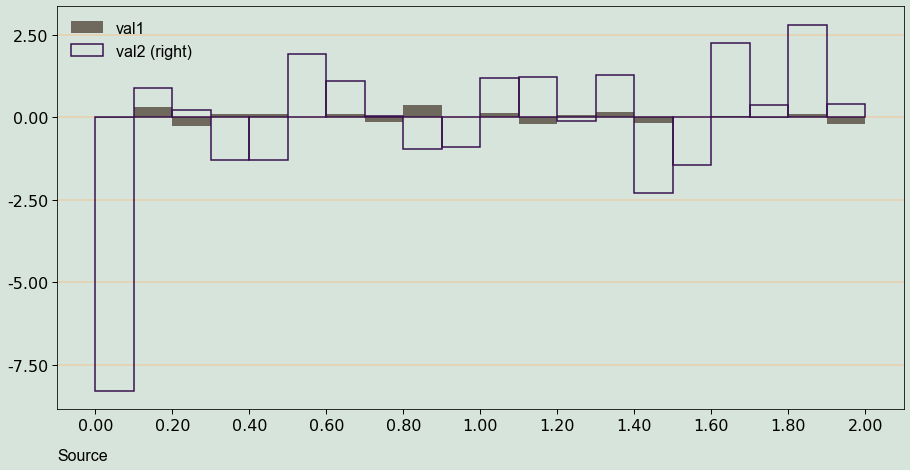

In [76]:
df = pd.DataFrame(np.random.randn(1000,3), columns = ['var1','var2','weight'])
df['type'] = np.nan; df.iloc[0:500,3] = 'type1'; df.iloc[500:,3] = 'type2' 
df_test = df.copy()

variable = 'var1'
grouper = 'type'
weighter = 'weight'
group1 = 'type1'
group2 = 'type2'

threshold = 2
step = 0.1
df_test.loc[df_test[variable] > threshold,variable] = threshold

y1 = df_test.loc[df_test[grouper] == group1,variable]
weights1 = df_test.loc[df_test[grouper] == group1,weighter]/df_test.loc[df_test[grouper] == group1,weighter].sum()

y2 = df_test.loc[df_test[grouper] == group2,variable]
weights2 = df_test.loc[df_test[grouper] == group2,weighter]/df_test.loc[df_test[grouper] == group2,weighter].sum()

y = [y1, y2]
weights = [weights1, weights2]

# hack for right-inclusion
bins = list(np.arange(0,threshold + step,step))
bins[1:] = [x + 0.000001 for x in bins[1:]]

pic_kwargs = {
                'figsize': (14,7),
                #'xticks':20,
                #'xlabel': variable + ', %',
                #'ylabel':'Osuus, %',
                #'yticklf':'{:.0%}',
                #'leg_title':"Oik. hännän leikkuri: {}\nHavaintoja yht.  = {}".format(threshold, len(y[0]) + len(y[1])),
                #'leg_title_size':16
                }

fig,ax,hist,hist2 = hist_two_series(y,weights,bins,labels, threshold = threshold, **pic_kwargs)

### Two-sided bar plot

DOES NOT WORK YET!

In [77]:
def two_sided_bar(y,values1,values2,noofcats,noofcats_inv,*args,**kwargs):
    """
    STILL INCOMPLETE
    
    Author Ville Voutilainen
    
    Version history

    - 27.12.2018 ver 0.1
       -> Initial build.
    """
    import sys

    from matplotlib import pyplot as plt
    import matplotlib.font_manager as font_manager
    import matplotlib.ticker as ticker
    from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter, FixedFormatter

    figsize        = kwargs.get('figsize', (1.52962 * 6,6)) # Patu plots are (in cm) 16.89 x 25.85
    xlabel         = kwargs.get('xlabel', '')
    ylabel         = kwargs.get('ylabel', '')
    yticklf        = kwargs.get('yticklf', '{:.0%}')
    xlabelSize     = kwargs.get('xlabelSize', 16)
    ylabelSize     = kwargs.get('ylabelSize', 16)        
    title          = kwargs.get('title', None)
    xlim           = kwargs.get('xlim', None)    
    sourcetext     = kwargs.get('sourcetext', 'fff')
    sourcetextsize = kwargs.get('sourcetextsize', 14)
    sourcetextbpad = kwargs.get('sourcetextbpad', 0.10)
    saveimgpath    = kwargs.get('saveimgpath', 'nosave')
                         
    # Force fonts
    arial_font = font_manager.FontProperties(family='Arial',style='normal', size=12)   
    force_font = {'fontname':'Arial'}

    # Define colors
    colors = \
    [
     "#D7E4DB" # white
    ,"#6F695D" # dark_grey
    ,"#370F4D" # dark_purple        
    ,"#e66f00" # brown       
    ,"#F09B0C" # orange      
    ,"#C6BD22" # yellow      
    ,"#916FBB" # light_purple
    ,"#5534BF" # purple      
    ,"#7D859C" # light_grey  
    ,"#ff3333" # red         
    ,"#666da3" # steelblue       
    ,"#ffb066" # text color orange
    ,"#9575bd" # text color purple
    ,"#b6bbc8" # text color grey  
    ,"#ff8080" # text color red   
    ,"#e1da51" # text color yellow
    ]

    # Fig skeleton
    fig = plt.figure(figsize = figsize) # original
    #fig = plt.figure(figsize = (1.52962 * 6,6.8)) # custom
    ax = fig.add_subplot(1,1,1)

    # Bar charts
    ax.barh(y, values1.values.flatten(), 0.5, color=colors[2])
    ax.barh(y, values2.values.flatten(), 0.5, color=colors[4])

    # Create second y axis for variable name
    newax = fig.add_axes(ax.get_position())
    newax.patch.set_visible(False)
    newax.spines['left'].set_position(('outward',0))
    newax.get_xaxis().set_visible(False)
    newax.set_ylim((ax.get_ylim())) # set same ylim as the other axis
    newax.spines["left"].set_visible(False)
    newax.spines["right"].set_visible(False)
    newax.spines["top"].set_visible(False)    
    newax.spines["bottom"].set_visible(False)

    # Some needed calculations
    lvl1_limits = list(df.index.get_level_values(0).unique())
    lvl2_limits = [yticklf.format(x) for x in  df.index.get_level_values(1).unique()]
                                       
    # Set second y axis minor labels
    def tick(x,pos):
        if x % noofcats_inv == noofcats_inv/2:
            return lvl1_limits[int(x)//noofcats_inv]
        else:
            return ""
    newax.yaxis.set_minor_locator(MultipleLocator(1))    
    newax.yaxis.set_minor_locator(ticker.FixedLocator((np.arange(24))))
    newax.yaxis.set_minor_formatter(FuncFormatter(tick))
    newax.tick_params(axis='y', which='minor',length=0,labelsize = 14) # here to turn on ticks for aligment
                                
    # Set second y axis major labels
    newax.yaxis.set_major_locator(MultipleLocator(noofcats_inv))
    newax.yaxis.set_major_formatter(NullFormatter())
    newax.tick_params(which="major", axis="y", length=0, width=1.5)

    # Set primary axis minor labels
    ax.yaxis.set_minor_locator(ticker.FixedLocator((np.arange(24))))
    ax.yaxis.set_minor_formatter(FixedFormatter(lvl2_limits*6))
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.tick_params(which="minor", axis="y", length=1, width=1, labelsize = 12)

    # Set primary axis minor labels
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: yticklf.format(x*1)))
    ax.tick_params(which="major", axis="x", labelsize = 16)                     
    
    # Primary axes xlim
    if xlim != None:
        ax.set_xlim(xlim)

    # Style grid
    ax.set_facecolor(colors[0])
    fig.patch.set_facecolor(colors[0])
    ax.grid(axis='y',which='minor',color=colors[11], linestyle='-', linewidth=2, alpha = 0.3)
    ax.set_axisbelow(True) # make sure grid stays in the backgorund

    # Style axes
    if title is not None:
        ax.set_title(title, fontsize = titlesize)

    ax.set_position([0.2, 0.125, 0.75, 0.77], which='both') # this replaces the usual subplots_adjust
    newax.set_position([0.125, 0.125, 0.75, 0.77], which='both')

    # Source text
    plt.text(0.2, 0.125 - sourcetextbpad, sourcetext, fontsize = sourcetextsize,
             fontname = 'Arial', transform=plt.gcf().transFigure)

    # ylabel unit text put on top of the axis
    plt.text(0.13, 0.92, 'lvl2_lim', fontsize = 12,fontname = 'Arial', transform=plt.gcf().transFigure)
    plt.text(0.035, 0.92, 'lvl1_lim', fontsize = 12,fontname = 'Arial', transform=plt.gcf().transFigure)
    
    if saveimgpath != 'nosave':
        plt.savefig(saveimgpath + ".png", dpi=300, facecolor = fig.get_facecolor(), edgecolor='none')

In [78]:
df = pd.DataFrame(np.random.randn(1000,2), columns = ['var1','var2'])
df['lvl1'] = [x for x in np.random.randint(0,3, size=1000)]
df['lvl2'] = [x for x in np.random.randint(4,6, size=1000)]

f = {'var1': ['min','max']}
df = df.groupby(['lvl1','lvl2']).agg(f)


pic_kwargs = {
             'figsize': (1.52962 * 6,6.8)
             }

# Prepare data
y = range(len(df))
values1 = df.iloc[:, (df.columns.get_level_values(0) == df.columns.get_level_values(0).values[0]) & (df.columns.get_level_values(1) == 'min')]
values2 = df.iloc[:, (df.columns.get_level_values(0) == df.columns.get_level_values(0).values[0]) & (df.columns.get_level_values(1) == 'max')]

noofcats = len(df.index.get_level_values(0).unique())
noofcats_inv = int(len(df.index.get_level_values(0)) / len(df.index.get_level_values(0).unique()) ) # nofocats / x = length of data points
 
 #two_sided_bar(y,values1,values2,noofcats,noofcats_inv, **pic_kwargs)